# Chapter 5: Supervised Learning Algorithms on Parade

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn, sklearn.tree, sklearn.linear_model, sklearn.ensemble, sklearn.svm, sklearn.neighbors, sklearn.metrics

%matplotlib inline
from IPython.core.pylabtools import figsize

## Generate some synthetic data

We'll do three different binary classification problems, all with 2D feature spaces

In [2]:
N = 250
np.random.seed(1)
X = np.random.uniform(0, 1, (1000, 2))

In [3]:
labels = [
    (((X[:,0]-0.5)**2 + (X[:,1]-0.5)**2) < 0.1).astype(int),
    ((X[:,0]) <= 0.25*np.sin(15*X[:,1])+0.5).astype(int),
    (np.arctan((X[:,0]-0.5)/(X[:,1]-0.5)) < 0.5*np.sin(np.sqrt(15*(X[:,0]-0.5)**2) + (X[:,1]-0.5)**2)).astype(int)
]

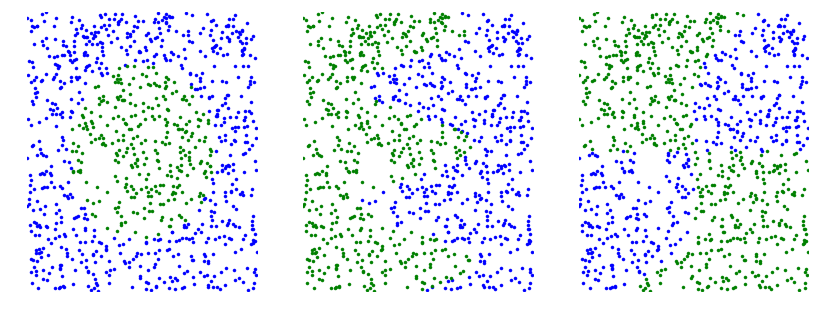

In [4]:
figsize(14,5)
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(X[labels[i]==0,0], X[labels[i]==0,1], ".")
    plt.plot(X[labels[i]==1,0], X[labels[i]==1,1], ".")
    plt.axis("off")

In [5]:
def fit_and_plot_models(model):
    XX, YY = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
    field = np.stack([XX.reshape(-1), YY.reshape(-1)])
    for i in range(3):
        plt.subplot(1,3,i+1)
        m = model.fit(X, labels[i])
        pred = m.predict(field.T)
        plt.imshow(pred.reshape((100,100)), origin="lower", extent=[0,1,0,1])
        plt.plot(X[labels[i]==0,0], X[labels[i]==0,1], ".")
        plt.plot(X[labels[i]==1,0], X[labels[i]==1,1], ".")
        plt.axis("off")

## Logistic Regression

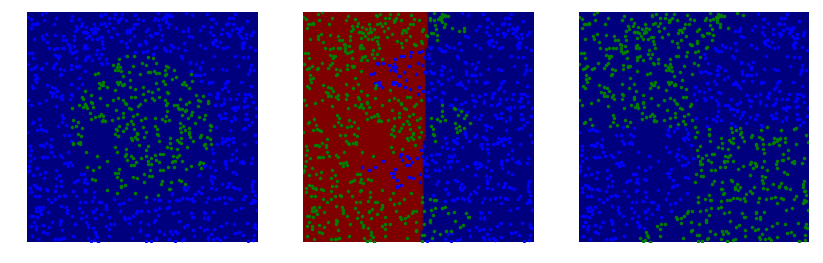

In [6]:
figsize(14,5)
fit_and_plot_models(sklearn.linear_model.LogisticRegression())

## k-Nearest Neighbors

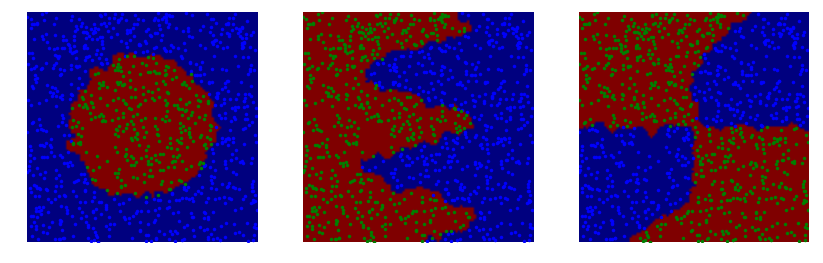

In [7]:
figsize(14,5)
fit_and_plot_models(sklearn.neighbors.KNeighborsClassifier(n_neighbors=3))

## Support Vector Machines

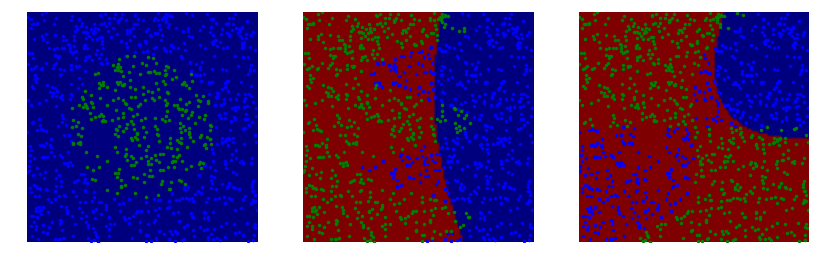

In [9]:
figsize(14,5)
fit_and_plot_models(sklearn.svm.SVC(kernel="poly"))

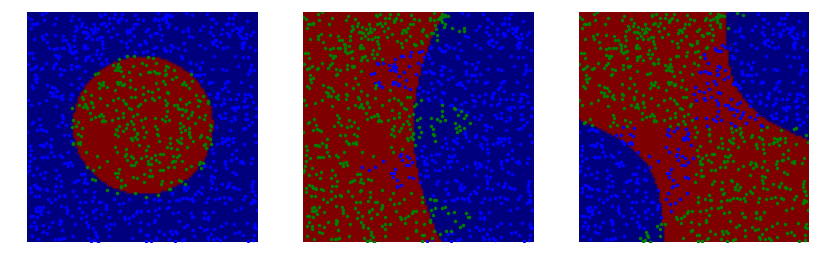

In [8]:
figsize(14,5)
fit_and_plot_models(sklearn.svm.SVC(kernel="rbf"))

## Decision Tree

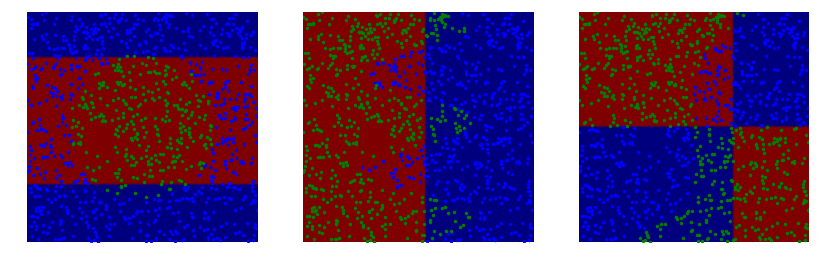

In [10]:
figsize(14,5)
fit_and_plot_models(sklearn.tree.DecisionTreeClassifier(max_depth=2))

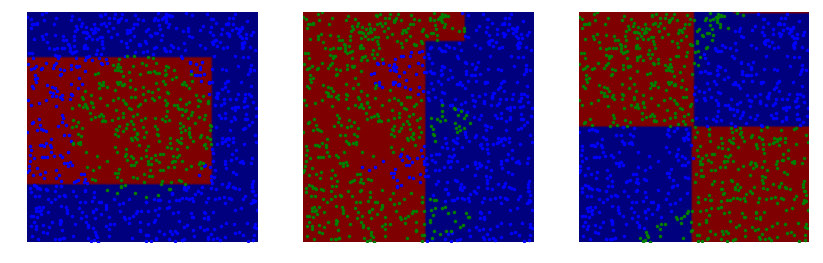

In [11]:
figsize(14,5)
fit_and_plot_models(sklearn.tree.DecisionTreeClassifier(max_depth=3))

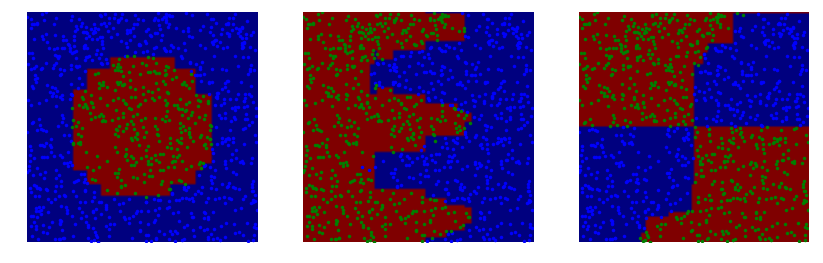

In [12]:
figsize(14,5)
fit_and_plot_models(sklearn.tree.DecisionTreeClassifier(max_depth=None))

## Random Forest

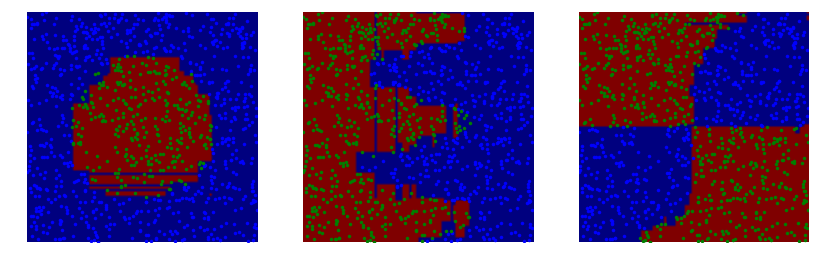

In [13]:
figsize(14,5)
fit_and_plot_models(sklearn.ensemble.RandomForestClassifier(n_estimators=2))

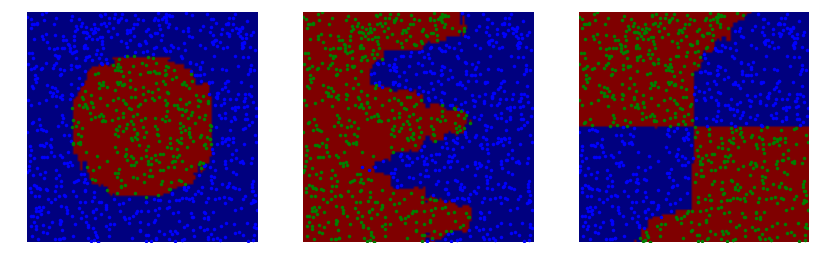

In [14]:
figsize(14,5)
fit_and_plot_models(sklearn.ensemble.RandomForestClassifier(n_estimators=25))

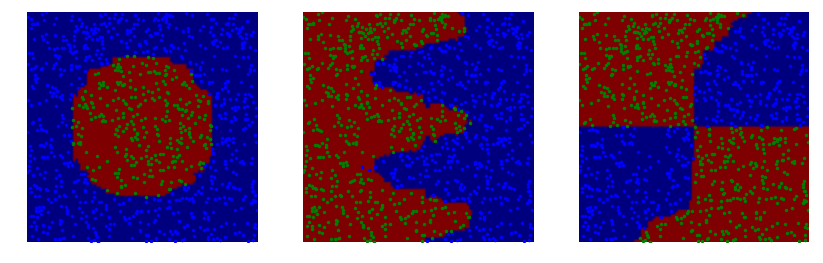

In [15]:
figsize(14,5)
fit_and_plot_models(sklearn.ensemble.RandomForestClassifier(n_estimators=250))